In [92]:
import pandas as pd
import numpy as np

In [93]:
# from google.colab import drive
# drive.mount('/content/drive')

In [94]:
df = pd.read_csv("SD3_data.csv")
df

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,P2,P3,P4,P5,P6,P7,P8,P9,country,source
0,4,4,4,4,4,4,4,3,4,2,...,4,3,2,4,4,4,4,4,GB,1
1,2,1,5,2,2,1,2,2,3,1,...,1,1,5,4,1,5,3,2,US,1
2,3,3,3,5,1,1,5,5,3,2,...,5,3,1,3,1,2,3,1,US,1
3,5,5,4,5,5,5,5,5,5,5,...,1,5,2,5,5,5,1,5,GB,3
4,4,4,2,5,5,5,4,1,4,3,...,5,3,1,4,3,5,4,1,GB,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18187,1,5,2,4,4,5,4,3,5,4,...,3,3,3,5,3,2,3,3,US,2
18188,5,4,5,4,5,4,5,4,5,4,...,2,2,1,5,2,2,3,4,GB,1
18189,4,3,3,4,2,3,4,3,4,3,...,5,3,1,1,1,2,4,1,US,2
18190,5,4,3,3,4,4,4,3,4,3,...,3,3,4,4,3,4,1,3,LK,2


In [95]:
# dropping the last two columns
df = df.drop(["country","source"], axis=1)
#The dropna() method removes the rows that contains NULL values
df.dropna(inplace = True)
df=df.drop_duplicates(keep='last')

In [96]:
df.shape

(18133, 27)

In [97]:
dfNumpy = df.to_numpy()

In [98]:
df

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,N9,P1,P2,P3,P4,P5,P6,P7,P8,P9
0,4,4,4,4,4,4,4,3,4,2,...,4,3,4,3,2,4,4,4,4,4
1,2,1,5,2,2,1,2,2,3,1,...,2,1,1,1,5,4,1,5,3,2
2,3,3,3,5,1,1,5,5,3,2,...,5,3,5,3,1,3,1,2,3,1
3,5,5,4,5,5,5,5,5,5,5,...,5,5,1,5,2,5,5,5,1,5
4,4,4,2,5,5,5,4,1,4,3,...,5,4,5,3,1,4,3,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18187,1,5,2,4,4,5,4,3,5,4,...,2,3,3,3,3,5,3,2,3,3
18188,5,4,5,4,5,4,5,4,5,4,...,3,3,2,2,1,5,2,2,3,4
18189,4,3,3,4,2,3,4,3,4,3,...,3,2,5,3,1,1,1,2,4,1
18190,5,4,3,3,4,4,4,3,4,3,...,4,4,3,3,4,4,3,4,1,3


In [99]:
M_P = []
N_P=[]
P_P=[]
class_label=[]
M = 9
N = 18
P = 27
columns = df.shape[1]
rows = df.shape[0]
# print(len(df.columns))
for i in range(rows):
  # minValue = 0
  mScore = 0
  nScore = 0
  pScore = 0
  for j in range(columns):
    if j>=0 and j<M:
      mScore+=dfNumpy[i][j]
    elif j>=M and j<N:
      nScore+=dfNumpy[i][j]
    elif j>=N and j<P:
      pScore+=dfNumpy[i][j]
  M_P.append(mScore/9)
  N_P.append(nScore/9)
  P_P.append(pScore/9)
  minValue = min((3.86-(mScore/9)),(3.68-(nScore/9)),(3.4-(pScore/9)))
  if minValue == 3.86-(mScore/9):
    class_label.append(0)
  elif minValue == 3.68-(nScore/9):
    class_label.append(1)
  else:
    class_label.append(2)

In [100]:
len(class_label)
# class_label

18133

In [101]:
df

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,N9,P1,P2,P3,P4,P5,P6,P7,P8,P9
0,4,4,4,4,4,4,4,3,4,2,...,4,3,4,3,2,4,4,4,4,4
1,2,1,5,2,2,1,2,2,3,1,...,2,1,1,1,5,4,1,5,3,2
2,3,3,3,5,1,1,5,5,3,2,...,5,3,5,3,1,3,1,2,3,1
3,5,5,4,5,5,5,5,5,5,5,...,5,5,1,5,2,5,5,5,1,5
4,4,4,2,5,5,5,4,1,4,3,...,5,4,5,3,1,4,3,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18187,1,5,2,4,4,5,4,3,5,4,...,2,3,3,3,3,5,3,2,3,3
18188,5,4,5,4,5,4,5,4,5,4,...,3,3,2,2,1,5,2,2,3,4
18189,4,3,3,4,2,3,4,3,4,3,...,3,2,5,3,1,1,1,2,4,1
18190,5,4,3,3,4,4,4,3,4,3,...,4,4,3,3,4,4,3,4,1,3


In [102]:
df['Class_label'] = class_label

In [103]:
df.head(10)

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,P1,P2,P3,P4,P5,P6,P7,P8,P9,Class_label
0,4,4,4,4,4,4,4,3,4,2,...,3,4,3,2,4,4,4,4,4,2
1,2,1,5,2,2,1,2,2,3,1,...,1,1,1,5,4,1,5,3,2,1
2,3,3,3,5,1,1,5,5,3,2,...,3,5,3,1,3,1,2,3,1,0
3,5,5,4,5,5,5,5,5,5,5,...,5,1,5,2,5,5,5,1,5,0
4,4,4,2,5,5,5,4,1,4,3,...,4,5,3,1,4,3,5,4,1,2
5,4,2,2,4,2,3,5,2,2,2,...,3,5,4,4,2,2,1,1,5,2
6,4,4,4,2,4,4,4,3,5,4,...,3,2,4,2,4,3,4,4,3,0
7,5,5,5,5,5,5,5,4,5,4,...,2,5,2,5,5,5,2,5,3,0
8,5,3,4,4,4,4,4,2,4,3,...,5,2,4,3,4,4,1,2,1,0
9,5,5,5,3,5,5,5,5,5,5,...,5,2,5,5,5,5,5,3,5,2


In [104]:
df.tail(10)

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,P1,P2,P3,P4,P5,P6,P7,P8,P9,Class_label
18182,5,5,1,5,5,5,5,5,5,3,...,5,1,5,5,5,5,1,3,1,0
18183,5,1,2,4,2,3,4,2,4,2,...,3,5,1,1,4,2,5,1,1,2
18184,5,5,5,4,2,5,5,4,5,5,...,4,2,5,5,5,3,1,5,2,0
18185,4,4,3,1,4,4,5,5,5,2,...,5,4,5,2,5,3,4,1,4,2
18186,4,5,4,5,5,5,5,4,5,2,...,4,4,3,4,5,4,1,4,5,0
18187,1,5,2,4,4,5,4,3,5,4,...,3,3,3,3,5,3,2,3,3,0
18188,5,4,5,4,5,4,5,4,5,4,...,3,2,2,1,5,2,2,3,4,0
18189,4,3,3,4,2,3,4,3,4,3,...,2,5,3,1,1,1,2,4,1,0
18190,5,4,3,3,4,4,4,3,4,3,...,4,3,3,4,4,3,4,1,3,0
18191,4,4,4,5,3,4,4,3,3,3,...,3,3,3,2,4,3,3,4,4,0


In [105]:
# normalizing data and converting to numpy
from mlxtend.preprocessing import minmax_scaling
df_normalized = df.to_numpy()
df_normalized = np.delete(df_normalized, 27, axis=1)
df_normalized = (df_normalized-np.min(df_normalized))/(np.max(df_normalized)-np.min(df_normalized))
print(df_normalized)

[[0.8 0.8 0.8 ... 0.8 0.8 0.8]
 [0.4 0.2 1.  ... 1.  0.6 0.4]
 [0.6 0.6 0.6 ... 0.4 0.6 0.2]
 ...
 [0.8 0.6 0.6 ... 0.4 0.8 0.2]
 [1.  0.8 0.6 ... 0.8 0.2 0.6]
 [0.8 0.8 0.8 ... 0.6 0.8 0.8]]


In [106]:
df_normalized = pd.DataFrame({'M1': df_normalized[:, 0],
                              'M2': df_normalized[:, 1],
                              'M3': df_normalized[:, 2],
                              'M4': df_normalized[:, 3],
                              'M5': df_normalized[:, 4],
                              'M6': df_normalized[:, 5],
                              'M7': df_normalized[:, 6],
                              'M8': df_normalized[:, 7],
                              'M9': df_normalized[:, 8],
                              'N1': df_normalized[:, 9],
                              'N2': df_normalized[:, 10],
                              'N3': df_normalized[:, 11],
                              'N4': df_normalized[:, 12],
                              'N5': df_normalized[:, 13],
                              'N6': df_normalized[:, 14],
                              'N7': df_normalized[:, 15],
                              'N8': df_normalized[:, 16],
                              'N9': df_normalized[:, 17],
                              'P1': df_normalized[:, 18],
                              'P2': df_normalized[:, 19],
                              'P3': df_normalized[:, 20],
                              'P4': df_normalized[:, 21],
                              'P5': df_normalized[:, 22],
                              'P6': df_normalized[:, 23],
                              'P7': df_normalized[:, 24],
                              'P8': df_normalized[:, 25],
                              'P9': df_normalized[:, 26]})
df_normalized

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,N9,P1,P2,P3,P4,P5,P6,P7,P8,P9
0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.6,0.8,0.4,...,0.8,0.6,0.8,0.6,0.4,0.8,0.8,0.8,0.8,0.8
1,0.4,0.2,1.0,0.4,0.4,0.2,0.4,0.4,0.6,0.2,...,0.4,0.2,0.2,0.2,1.0,0.8,0.2,1.0,0.6,0.4
2,0.6,0.6,0.6,1.0,0.2,0.2,1.0,1.0,0.6,0.4,...,1.0,0.6,1.0,0.6,0.2,0.6,0.2,0.4,0.6,0.2
3,1.0,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.2,1.0,0.4,1.0,1.0,1.0,0.2,1.0
4,0.8,0.8,0.4,1.0,1.0,1.0,0.8,0.2,0.8,0.6,...,1.0,0.8,1.0,0.6,0.2,0.8,0.6,1.0,0.8,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18128,0.2,1.0,0.4,0.8,0.8,1.0,0.8,0.6,1.0,0.8,...,0.4,0.6,0.6,0.6,0.6,1.0,0.6,0.4,0.6,0.6
18129,1.0,0.8,1.0,0.8,1.0,0.8,1.0,0.8,1.0,0.8,...,0.6,0.6,0.4,0.4,0.2,1.0,0.4,0.4,0.6,0.8
18130,0.8,0.6,0.6,0.8,0.4,0.6,0.8,0.6,0.8,0.6,...,0.6,0.4,1.0,0.6,0.2,0.2,0.2,0.4,0.8,0.2
18131,1.0,0.8,0.6,0.6,0.8,0.8,0.8,0.6,0.8,0.6,...,0.8,0.8,0.6,0.6,0.8,0.8,0.6,0.8,0.2,0.6


In [107]:
df_normalized['Class_label'] = class_label

In [108]:
df_normalized

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,P1,P2,P3,P4,P5,P6,P7,P8,P9,Class_label
0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.6,0.8,0.4,...,0.6,0.8,0.6,0.4,0.8,0.8,0.8,0.8,0.8,2
1,0.4,0.2,1.0,0.4,0.4,0.2,0.4,0.4,0.6,0.2,...,0.2,0.2,0.2,1.0,0.8,0.2,1.0,0.6,0.4,1
2,0.6,0.6,0.6,1.0,0.2,0.2,1.0,1.0,0.6,0.4,...,0.6,1.0,0.6,0.2,0.6,0.2,0.4,0.6,0.2,0
3,1.0,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.2,1.0,0.4,1.0,1.0,1.0,0.2,1.0,0
4,0.8,0.8,0.4,1.0,1.0,1.0,0.8,0.2,0.8,0.6,...,0.8,1.0,0.6,0.2,0.8,0.6,1.0,0.8,0.2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18128,0.2,1.0,0.4,0.8,0.8,1.0,0.8,0.6,1.0,0.8,...,0.6,0.6,0.6,0.6,1.0,0.6,0.4,0.6,0.6,0
18129,1.0,0.8,1.0,0.8,1.0,0.8,1.0,0.8,1.0,0.8,...,0.6,0.4,0.4,0.2,1.0,0.4,0.4,0.6,0.8,0
18130,0.8,0.6,0.6,0.8,0.4,0.6,0.8,0.6,0.8,0.6,...,0.4,1.0,0.6,0.2,0.2,0.2,0.4,0.8,0.2,0
18131,1.0,0.8,0.6,0.6,0.8,0.8,0.8,0.6,0.8,0.6,...,0.8,0.6,0.6,0.8,0.8,0.6,0.8,0.2,0.6,0


In [109]:
x=df_normalized.drop('Class_label',axis=1)
y=df_normalized['Class_label']

In [110]:
import random
from sklearn.model_selection import train_test_split
train_X ,test_X , train_y ,test_y = train_test_split(x,y,test_size=0.2,random_state=random.randint(0,100))

# **Built in Logistic Regression**

In [111]:
iter=5000
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter=iter).fit(train_X,train_y)

In [112]:
reg.score(train_X,train_y)

0.9988970081345651

In [113]:
y_p=reg.predict(test_X)
print(y_p)

[2 0 2 ... 0 0 0]


In [114]:
reg.predict_proba(test_X)

array([[2.45723581e-01, 3.03504510e-07, 7.54276116e-01],
       [9.99999975e-01, 1.66045443e-09, 2.35007510e-08],
       [2.67933760e-04, 2.69607628e-01, 7.30124439e-01],
       ...,
       [9.99998432e-01, 1.41446590e-06, 1.53718135e-07],
       [9.99998920e-01, 1.33728273e-08, 1.06683146e-06],
       [9.99958437e-01, 3.57467578e-05, 5.81577786e-06]])

In [115]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(test_y, y_p)
print(cm1)

[[2194    0    0]
 [   5  583    0]
 [   0    0  845]]


Text(33.22222222222222, 0.5, 'Truth or Actual Value')

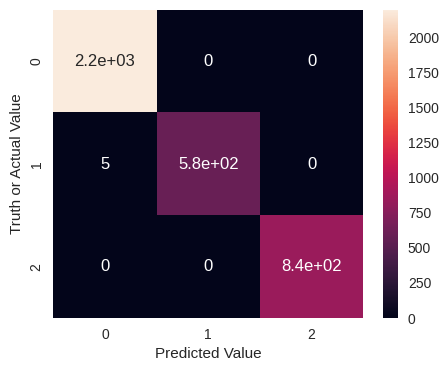

In [116]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sn.heatmap(cm1, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

# **Decision Tree**

In [117]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier().fit(train_X, train_y)
reg.score(train_X,train_y)

0.9988970081345651

In [118]:
y_predD = dtree_model.predict(test_X)
print(y_predD)

[0 0 1 ... 0 0 0]


In [119]:
# creating a confusion matrix
cm2 = confusion_matrix(test_y, y_predD)
print(cm2)

[[1796  122  276]
 [ 153  317  118]
 [ 278  136  431]]


Text(33.22222222222222, 0.5, 'Truth or Actual Value')

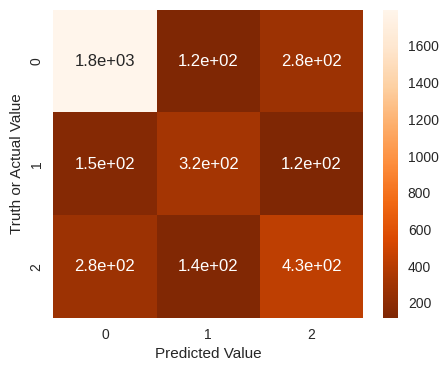

In [120]:
plt.figure(figsize = (5,4))
sn.heatmap(cm2, annot=True,cmap='Oranges_r')
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=iter).fit(train_X ,train_y)

In [ ]:
clf.score(train_X,train_y)

In [ ]:
y_predR=clf.predict(test_X)
print(y_predR)

In [ ]:
# creating a confusion matrix
cm3 = confusion_matrix(test_y, y_predR)
print(cm3)

In [ ]:
plt.figure(figsize = (5,4))
sn.heatmap(cm3, annot=True,cmap='Greens_r')
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

# **SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier=SVC(kernel="linear",gamma="auto",C=2).fit(train_X,train_y)
classifier.score(train_X,train_y)

In [ ]:
ypredsvm=classifier.predict(test_X)
print(ypredsvm)

In [ ]:
# creating a confusion matrix
cm4 = confusion_matrix(test_y, ypredsvm)
print(cm4)

In [ ]:
plt.figure(figsize = (5,4))
sn.heatmap(cm4, annot=True,cmap='Blues_r')
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

In [ ]:
print(class_label)

In [ ]:
import matplotlib.pyplot as plt

M,N,P = 0,0,0
for i in range(len(class_label)):
  if class_label[i] == 0: M+=1
  elif class_label[i] == 1: N+=1
  elif class_label[i] == 2: P+=1
print(M)
print(N)
print(P)

BarChart = {
    'Machiavellianism':M,
    'Narcissism':N,
    'Psychopathy':P
}



triads = list(BarChart.keys())
values = list(BarChart.values())
print(triads)

fig = plt.figure()
plt.bar(triads, values,width = 0.4) 
plt.xlabel("The 3 Short Dark Triads")
plt.ylabel("No. of People Who Fall in The Catagories")
plt.title("Chart Showing The Overall Number Of People Who Fall In Either Catagory")
plt.show()

In [ ]:
import numpy as np
df_numpy = df.to_numpy()
# print(df_numpy)
df_numpy = np.delete(df_numpy, 27, axis=1)
# print(df_numpy)
# print(df_numpy.shape)
MAnswer = []
NAnswer = []
PAnswer = []

sum = df_numpy.sum(axis=0)
print(sum)

MBarChart = {
    'M1':sum[0]/len(df_normalized),'M2':sum[1]/len(df_normalized),'M3':sum[2]/len(df_normalized),
    'M4':sum[3]/len(df_normalized),'M5':sum[4]/len(df_normalized),'M6':sum[5]/len(df_normalized),
    'M7':sum[6]/len(df_normalized),'M8':sum[7]/len(df_normalized),'M9':sum[8]/len(df_normalized)
}
M = list(MBarChart.keys())
Pvalues = list(MBarChart.values())
print(M)
fig = plt.figure()
plt.bar(M, Pvalues,width = 0.4) 
plt.xlabel("Machiavellianism Questions")
plt.ylabel("Scores")
plt.title("Average Response Analysis for Machiavellianism")
plt.show()
NBarChart = {
    'N1':sum[9]/len(df_normalized),'N2':sum[10]/len(df_normalized),'N3':sum[11]/len(df_normalized),
    'N4':sum[12]/len(df_normalized),'N5':sum[13]/len(df_normalized),'N6':sum[14]/len(df_normalized),
    'N7':sum[15]/len(df_normalized),'N8':sum[16]/len(df_normalized),'N9':sum[17]/len(df_normalized)
}
N = list(NBarChart.keys())
Pvalues = list(NBarChart.values())
print(N)
fig = plt.figure()
plt.bar(N, Pvalues,width = 0.4) 
plt.xlabel("Narcissism Questions")
plt.ylabel("Scores")
plt.title("Average Response Analysis for Narcissism ")
plt.show()
PBarChart = {
    'P1':sum[18]/len(df_normalized),'P2':sum[19]/len(df_normalized),'P3':sum[20]/len(df_normalized),
    'P4':sum[21]/len(df_normalized),'P5':sum[22]/len(df_normalized),'P6':sum[23]/len(df_normalized),
    'P7':sum[24]/len(df_normalized),'P8':sum[25]/len(df_normalized),'P9':sum[26]/len(df_normalized)
}
P = list(PBarChart.keys())
Pvalues = list(PBarChart.values())
print(P)
fig = plt.figure()
plt.bar(P, Pvalues,width = 0.4) 
plt.xlabel("Psychopathy Questions")
plt.ylabel("Scores")
plt.title("Average Response Analysis for Psychopathy")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


BLRa=accuracy_score(test_y, y_p)
#SLRa=accuracy_score(test_y, ypredsc)
SVMa=accuracy_score(test_y, ypredsvm)
RFa=accuracy_score(test_y, y_predR)
DTa=accuracy_score(test_y, y_predD)

BLRp=precision_score(test_y, y_p,average='weighted')
#SLRp=precision_score(test_y, ypredsc,average='weighted')
SVMp=precision_score(test_y, ypredsvm,average='weighted')
RFp=precision_score(test_y, y_predR,average='weighted')
DTp=precision_score(test_y, y_predD,average='weighted')


BLRr=recall_score(test_y, y_p,average='weighted')
#SLRr=recall_score(test_y, ypredsc,average='weighted')
SVMr=recall_score(test_y, ypredsvm,average='weighted')
RFr=recall_score(test_y, y_predR,average='weighted')
DTr=recall_score(test_y, y_predD,average='weighted')



BLRf=f1_score(test_y, y_p,average='weighted')
#SLRf=f1_score(test_y, ypredsc,average='weighted')
SVMf=f1_score(test_y, ypredsvm,average='weighted')
RFf=f1_score(test_y, y_predR,average='weighted')
DTf=f1_score(test_y, y_predD,average='weighted')


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
# Import Library

import numpy as np 
import matplotlib.pyplot as plt 

# Define Data

team = ['Logistic','Logistic Scratch','SVM','Random Forest','Decision Tree']
Accuracy = [BLRa,SLRa,SVMa,RFa,DTa]
Precision = [BLRp,SLRp,SVMp,RFp,DTp]
Recall = [BLRr,SLRr,SVMr,RFr,DTr]
F1=[BLRf,SLRf,SVMf,RFf,DTf]
x_axis = np.arange(len(team))

# Multi bar Chart

plt.bar(x_axis +0.20, Accuracy, width=0.2, label = 'Accuracy')
plt.bar(x_axis +0.20*2, Precision, width=0.2, label = 'Precision')
plt.bar(x_axis +0.20*3, Recall, width=0.2, label = 'Recall')
plt.bar(x_axis +0.20*4, F1, width=0.2, label = 'F1')



plt.xticks(x_axis,team)



plt.legend()



plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("Logistic Regression's evaluation metrics")
print(classification_report(test_y,y_p))
print("SVM evaluation metrics")
print(classification_report(test_y,ypredsvm))
print("Random Forest evaluation metrics")
print(classification_report(test_y,y_predR))
print("Decision Tree evaluation metrics")
print(classification_report(test_y,y_predD))

In [ ]:
list_of_column_names = list(df_normalized.columns)

In [ ]:
a=df_normalized.corr().to_numpy()
heatmap=plt.imshow(a, cmap='flag')
plt.colorbar(heatmap)

In [ ]:
from yellowbrick.classifier import ROCAUC
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["0", "1", "2"])
visualizer.fit(train_X,train_y)        
visualizer.score(test_X,test_y)        
visualizer.show()     

In [ ]:
viz = ROCAUC(SVC(probability=True))
viz.fit(train_X,train_y)
viz.score(test_X,test_y)
viz.show()

In [ ]:
bf=pd.DataFrame(M_P,columns=['M_P'])
bf['N_P']=pd.DataFrame(N_P)
bf['P_P']=pd.DataFrame(P_P)
bf['class_label']=pd.DataFrame(class_label)
bf

In [ ]:
import seaborn as sns
sns.pairplot(bf, kind="hist",hue='class_label')

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Machiavellianism, Narcissism and Psychopathy', fontweight='bold', fontsize=16)
plt.xlabel('Questions')
plt.ylabel('Score')
scatter = plt.scatter(bf['M_P'], bf['N_P'], bf['N_P'] , c= bf['class_label'], cmap='viridis')
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.show()

In [ ]:
sns.lmplot(x="M_P", y="N_P", data=bf, fit_reg=True, hue='class_label', legend=True)
sns.lmplot(x="M_P", y="P_P", data=bf, fit_reg=True, hue='class_label', legend=True)
sns.lmplot(x="N_P", y="P_P", data=bf, fit_reg=True, hue='class_label', legend=True)